# **ANÁLISIS DE VIVIENDA EN MELBOURNE (AUSTRALIA)**  <br>





El presente trabajo se basa del dataset del siguiente link de Kaggle: <br>
https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot

Dicho dataset cuanta con 21 columnas y 13581 filas (incluyendo los títulos), entre lo que podemos destacar: <br>



* Suburb: Suburbio
* Address: Dirección
* Rooms: Númeroro de habitaciones
* Type: Tipo de viviendas (Ej. habitaciones, casa, etc)
* Price: Precio en Dolares Australianos
* Method: Método de adquisición (Propiedad vendida, propiedad transferida, etc)
* SellerG: Vendedor (Real State Agent)
* Date: Fecha de venta
* Distance Distancia del centro (CBD) en km.
* Postcode: Codigo Postal
* Bedroom2: Número de habitaciones (Sin contar la habitación principal)
* Bathroom: Número de baños
* Car: Nro de sitios de parqueo
* Landsize: Área del terreno (m2)
* BuildingArea: Área contruida (m2)
* YearBuilt: Año de construcción
* CouncilArea: Governing council for the area
* Lattitude: Latitud
* Longtitude: Longitud
* Regionname: Región donde se ubica
* Propertycount: Número de propiedades que exiten en ese suburbio

**Las definiciones se pueden obtener del dataset origen** (https://www.kaggle.com/datasets/anthonypino/melbourne-housing-market)

### **Hipótesis**






Existe una relación directa entre el terreno de la vivienda (m2) y el precio.

### **Objetivo**


En el presente trabajo crearé al menos 3 gráficos con Matplotlib y 3 con Seaborn para contestar las hipótesis planteadas. Además, entre los gráficos se debe incluir alguna con 3 variables.

# **ANÁLISIS EXPLORATORIO**

### **Preparativos e importación de datos**

In [1]:
# Empiezo importando las librerias necesarias:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
#Importo el archivo (Debe estar en el mismo directorio que este archivo Python):
melb_df = pd.read_csv("melb_data.csv")

In [3]:
#Verifico la importación
melb_df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [4]:
#Obtengo los encabezados (para poder guiarme más facilmente)
for column in melb_df:
  print(column)

Suburb
Address
Rooms
Type
Price
Method
SellerG
Date
Distance
Postcode
Bedroom2
Bathroom
Car
Landsize
BuildingArea
YearBuilt
CouncilArea
Lattitude
Longtitude
Regionname
Propertycount


In [5]:
#resumen del DF
melb_df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


Observando los cuartiles, se puede evidenciar que existe al menos un outlier en nro de cuartos y habitaciones (q75%: 3 y 3, y max 10 y 8 respectivamente)

### **Comparaciones iniciales**

In [6]:
#Cantidad de viviendas por Región
#Resumen
pd.value_counts(melb_df['Regionname'])

Regionname
Southern Metropolitan         4695
Northern Metropolitan         3890
Western Metropolitan          2948
Eastern Metropolitan          1471
South-Eastern Metropolitan     450
Eastern Victoria                53
Northern Victoria               41
Western Victoria                32
Name: count, dtype: int64

In [7]:
#Creo el resumen en DF con el Porcentaje

#Creo listas vacias
Regionname = []
Count_region = []
Porcentaje = []

#Itero por cada elemento unico de "Regionname" y añado el nombre, la cantidad y el porcentaje de esa region en su respectiva lista
for i in melb_df['Regionname'].unique():
  Regionname.append(i)
  Count_region.append(melb_df['Regionname'].loc[melb_df['Regionname'] == i].count())
  #Para el porcentaje hago el calculo y luego lo formateo
  Porc_temp = Count_region[-1] / melb_df['Regionname'].count()
  Porcentaje.append(round(Porc_temp*100,1))


#Creo el DF a partir de las listas vacios
Nro_viviendas_region = pd.DataFrame(
    list(zip(Regionname, Count_region, Porcentaje)),
    columns = ['Región', 'Count', 'Porcentaje']
    )

#Muestro el resultado
Nro_viviendas_region


,Región,Count,Porcentaje
0,Northern Metropolitan,3890,28.6
1,Western Metropolitan,2948,21.7
2,Southern Metropolitan,4695,34.6
3,Eastern Metropolitan,1471,10.8
4,South-Eastern Metropolitan,450,3.3
5,Eastern Victoria,53,0.4
6,Northern Victoria,41,0.3
7,Western Victoria,32,0.2


Text(0.5, 1.0, 'Piechart de distribucion viviendas por Región')

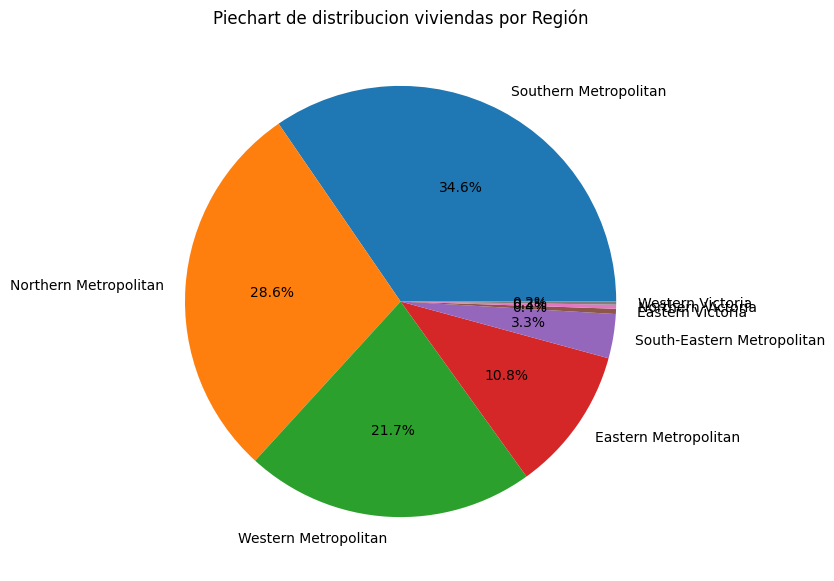

In [8]:
#Gráfico el DF resumen de cantidad de viviendas por Región (En Matplotlib)
Conteo_region = pd.value_counts(melb_df['Regionname'])

fig,ax = plt.subplots(figsize =(10, 7))
ax.pie(Conteo_region, labels = Conteo_region.index, autopct='%1.1f%%')
plt.title('Piechart de distribucion viviendas por Región')



In [9]:
#Creare el grafico con Plotly para tener el gráfico más limpio
import plotly.express as px
Viviendas_region = melb_df['Regionname'].value_counts()
fig = px.pie(values=Viviendas_region,
             title="Piechart de distribucion viviendas por Región",
             names=Viviendas_region.index)
fig.update_traces(textinfo='percent+label')

Se puede observar que las regiones con más viviendas son Southern Metropolitan, Northern Metropolitan, Wester Metropolitan con 31.4%, 28.4% y 23.1% respectivamente.

### **Análisis Precio**

<Axes: xlabel='Price', ylabel='Density'>

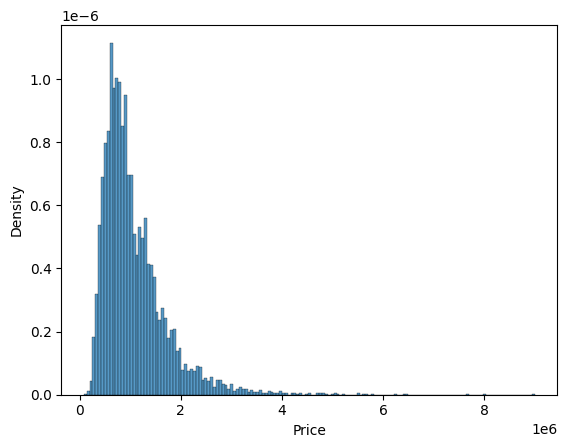

In [10]:
#Grafico de distribución con Seaborn (Precios):
sns.histplot(melb_df, x="Price", stat='density', legend=True)

In [11]:
melb_df['Price'].describe()

count    1.358000e+04
mean     1.075684e+06
std      6.393107e+05
min      8.500000e+04
25%      6.500000e+05
50%      9.030000e+05
75%      1.330000e+06
max      9.000000e+06
Name: Price, dtype: float64

Se puede observar que la media va entre los 1.5 a 1.8 millones AUD. Sin embargo, la mediana del resumen esta en 1.07 millones AUD. Ello indica que existen outlier de algunos pocos precios muy por encima.
Aún así, no se prueba que afecte directamente a las hipótesis planteadas.

### **Análisis precio vs terreno**

In [12]:
#Haremos un resumen estadistico de Landsize:
melb_df['Landsize'].describe()

count     13580.000000
mean        558.416127
std        3990.669241
min           0.000000
25%         177.000000
50%         440.000000
75%         651.000000
max      433014.000000
Name: Landsize, dtype: float64

In [13]:
#No puede existir un terreno de 0 m2, por lo cual redifire datos incongruentes como vacios (NaN).
#Considero habitable un mínimo de 4m2
melb_df.loc[melb_df['Landsize'] < 4] = np.NaN

#Y compruebo las nuevas estadísticas de Landsize:
melb_df['Landsize'].describe()

count     11637.000000
mean        651.652831
std        4303.944312
min           5.000000
25%         270.000000
50%         533.000000
75%         676.000000
max      433014.000000
Name: Landsize, dtype: float64

Text(0.5, 1.0, 'Gráfico de puntos: Precio vs área del terreno')

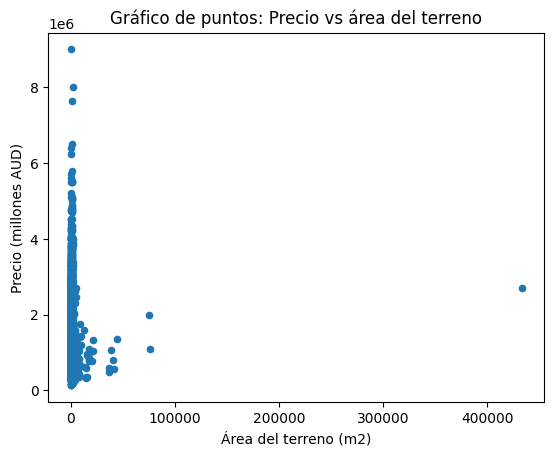

In [14]:
#Para comprobar la hipótesis, graficaremos el precio vs el área del terreno.
melb_df.plot.scatter(x='Landsize', y='Price')

#Y la etiquetas
plt.xlabel('Área del terreno (m2)')
plt.ylabel('Precio (millones AUD)')
plt.title("Gráfico de puntos: Precio vs área del terreno")

Se comprueba un outlier donde el terreno es mayor a 400000m2 y el precio esta al rededor de los 3 millones de AUD. Por tanto, crearemos un nuevo data frame donde iremos eliminando estos outliers.

In [15]:
#Creación de un nuevo DF donde el terreno no exceda los 100000m2 (Solo el outlier mencionado no cumple esta condición)
melb_df2 = melb_df.loc[melb_df['Landsize'] < 400000]

#Y muestro el nuevo resumen estadístico
melb_df['Landsize'].describe()

count     11637.000000
mean        651.652831
std        4303.944312
min           5.000000
25%         270.000000
50%         533.000000
75%         676.000000
max      433014.000000
Name: Landsize, dtype: float64

Text(0.5, 1.0, 'Gráfico de puntos: Precio vs área del terreno')

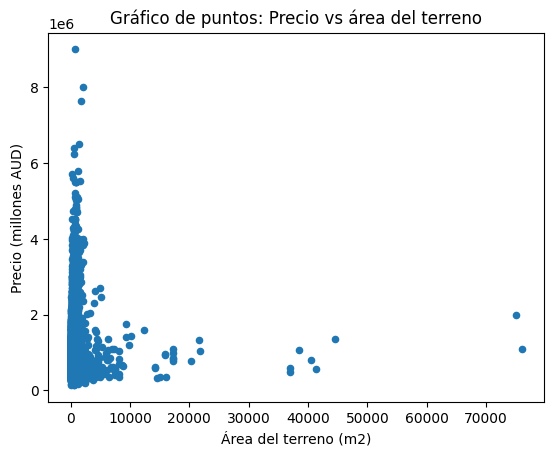

In [16]:
#Para comprobar la hipótesis, graficaremos el precio vs el área del terreno.
melb_df2.plot.scatter(x='Landsize', y='Price')

#Y la etiquetas
plt.xlabel('Área del terreno (m2)')
plt.ylabel('Precio (millones AUD)')
plt.title("Gráfico de puntos: Precio vs área del terreno")

Text(0.5, 1.0, 'Gráfico de puntos: Precio vs área del terreno')

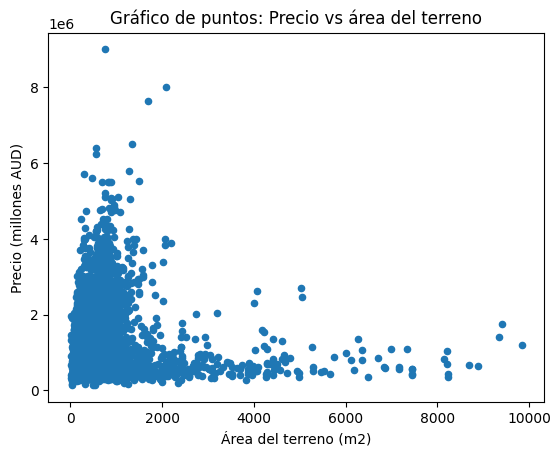

In [17]:
#Se siguen observando Outliers. Por tanto, limpiaremos los datos con Landsize menor a 10000 m2
melb_df.loc[melb_df['Landsize'] < 10000].plot.scatter(x='Landsize', y='Price')

#Y la etiquetas
plt.xlabel('Área del terreno (m2)')
plt.ylabel('Precio (millones AUD)')
plt.title("Gráfico de puntos: Precio vs área del terreno")

Se observa que no hay relación entre el precio y el área del terreno. Por tanto, la hipótesis planteada es falsa.

### **Análisis precio vs terreno respecto a la región**

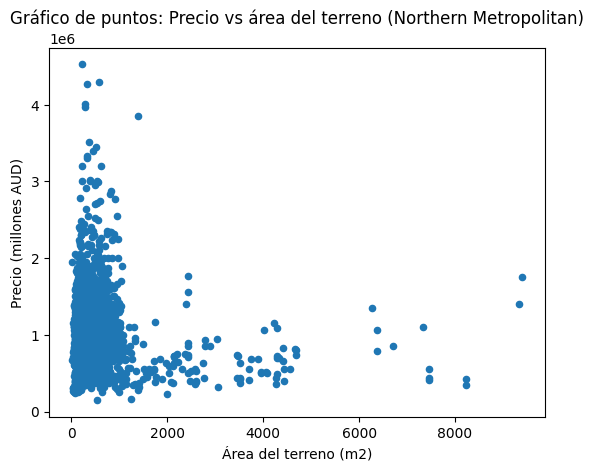

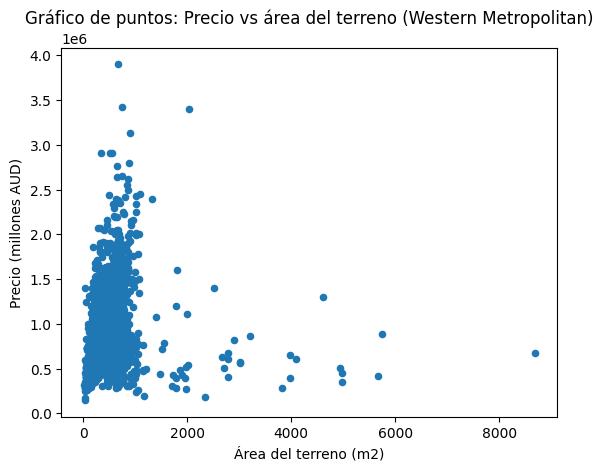

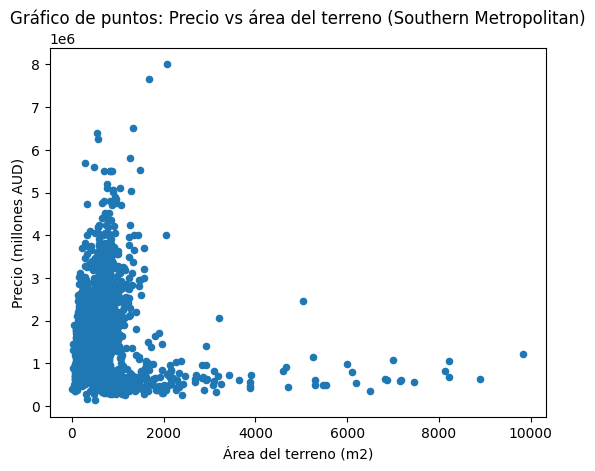

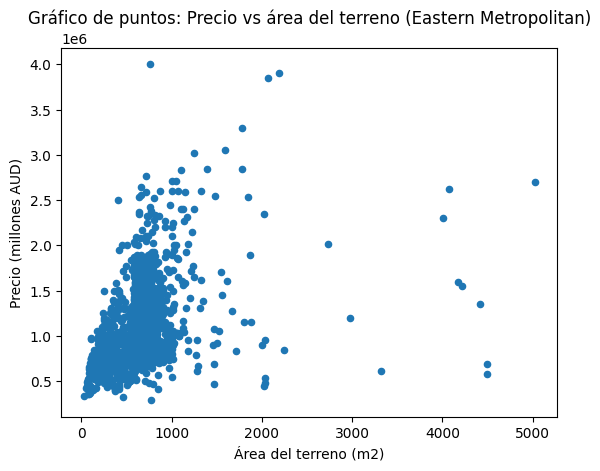

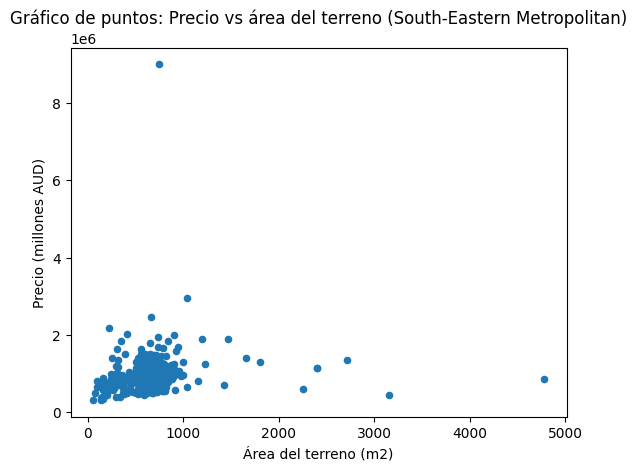

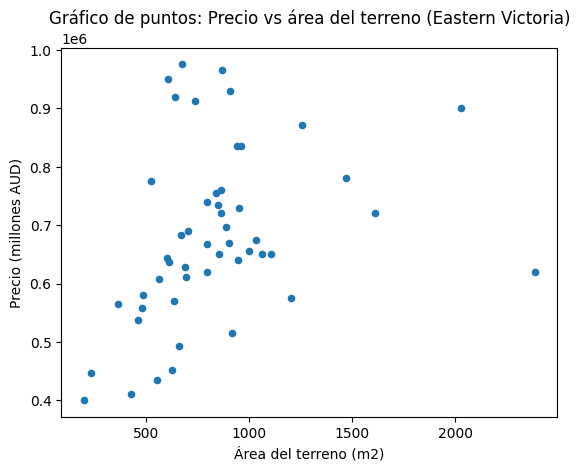

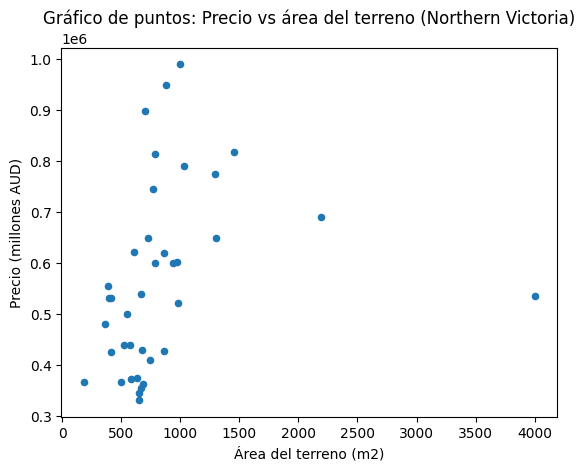

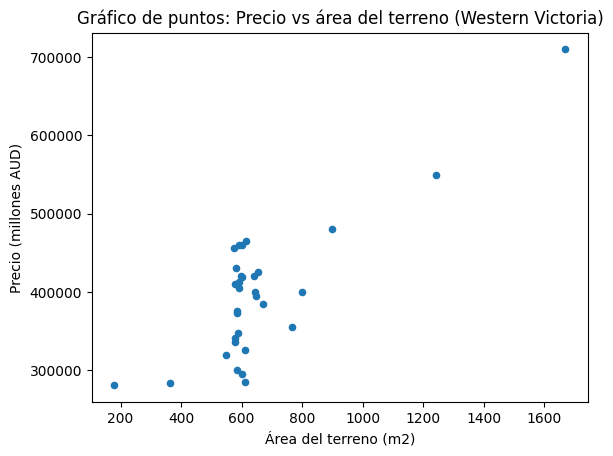

In [18]:
#Haremos el gráfico anterior, pero ahora por Región
#Filtrare en un DF el DF original con la variable Landsize < 10000 para agilizar el proceso
melb_df3 = melb_df.loc[melb_df['Landsize'] < 10000]

#Y creare el gráfico itirando sobre Regionmame:
for i in melb_df3['Regionname'].unique():
  #Creo el DF filtrando la Region
  x =  melb_df3.loc[melb_df3['Regionname'] == i]
  #Y Gráfico ese DF Filtro
  x.plot.scatter(x='Landsize', y='Price')

  #Y la etiquetas
  plt.xlabel('Área del terreno (m2)')
  plt.ylabel('Precio (millones AUD)')
  plt.title(f'Gráfico de puntos: Precio vs área del terreno ({i})')

Algunas regiones tienen mejor relación Área con Precio, pero siue sin ser una condición que se cumpla.

### **Análisis precio vs terreno respecto a la región y distancia CBD (Km)**

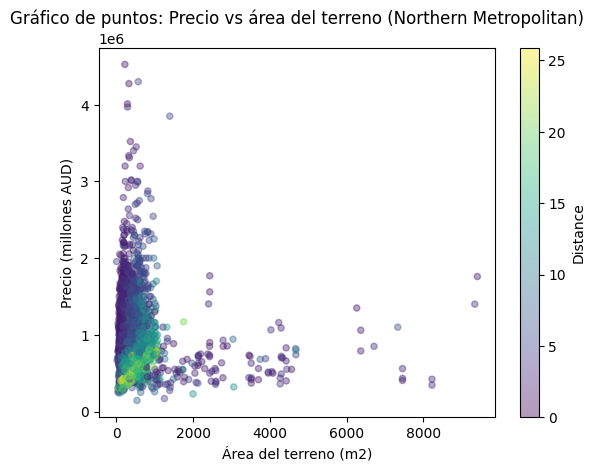

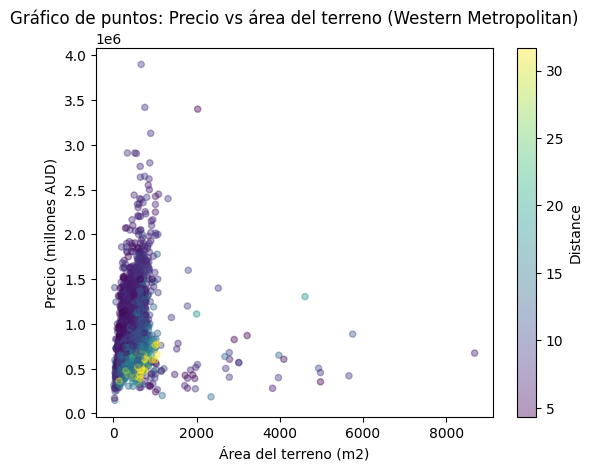

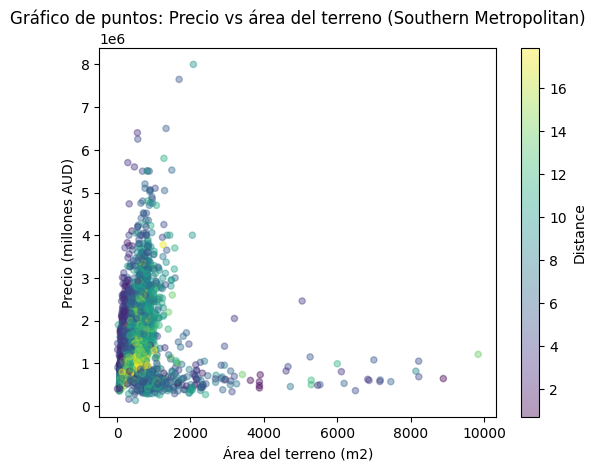

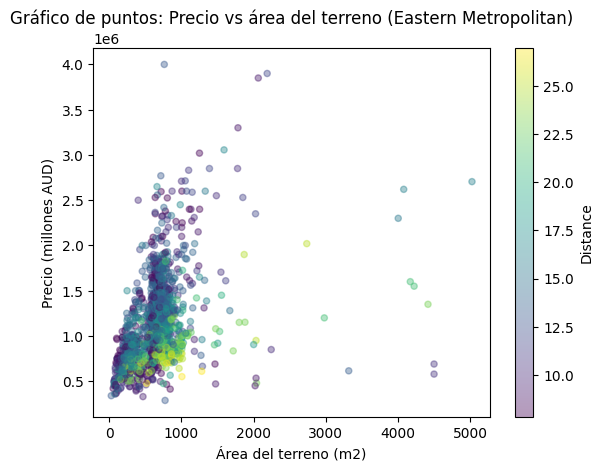

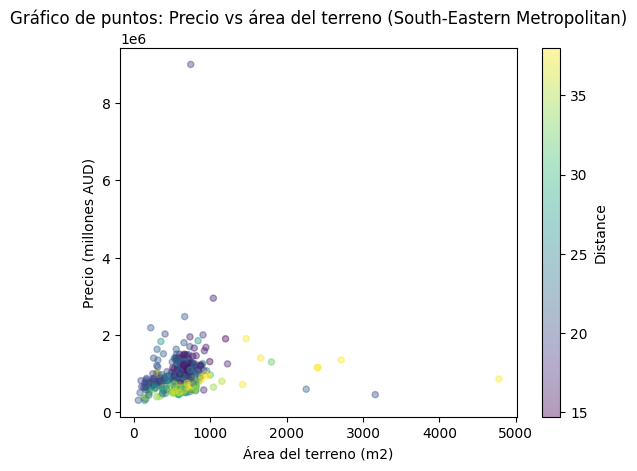

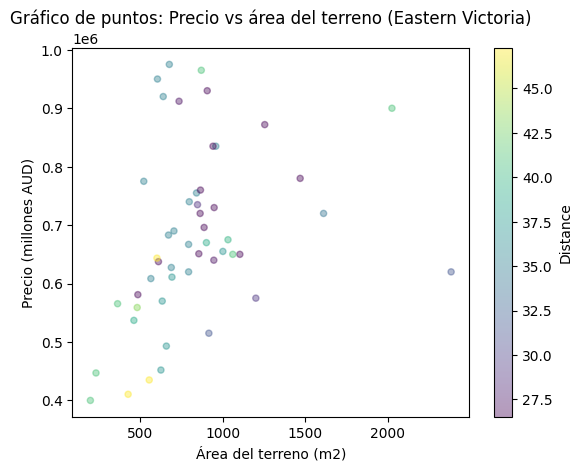

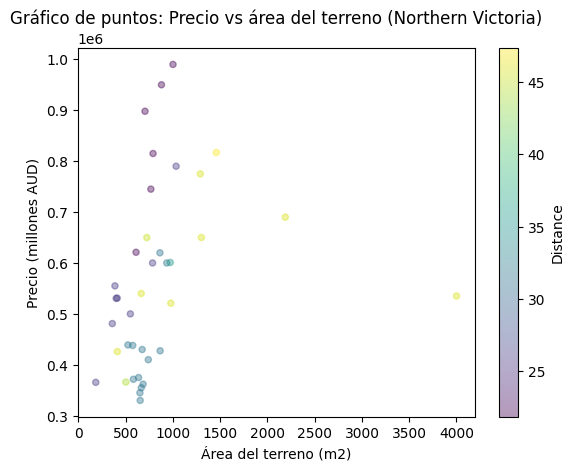

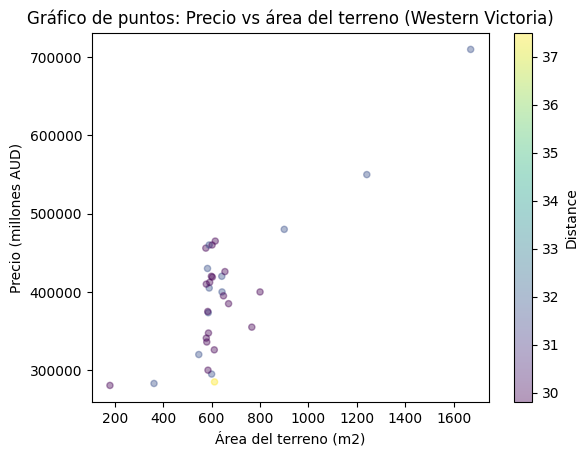

In [19]:
#Haremos el gráfico anterior, pero ahora distinguiremos la visualización por distancia del CDB.

#Creare el gráfico itirando sobre Regionmame:
for i in melb_df3['Regionname'].unique():
  #Creo el DF filtrando la Region
  x =  melb_df3.loc[melb_df3['Regionname'] == i]
  #Y Gráfico ese DF Filtro, incluyendo color por distancia y opacidad al 40% para distinguir los puntos
  x.plot.scatter(x='Landsize', y='Price', c="Distance", alpha=0.4)

  #Y la etiquetas
  plt.xlabel('Área del terreno (m2)')
  plt.ylabel('Precio (millones AUD)')
  plt.title(f'Gráfico de puntos: Precio vs área del terreno ({i})')

Aún con los filtros de Región y distancia del CDB no se ve una relación clara entre precio y Área del terreno.

### **Gráficos finales**

#### Heatmap de correlación

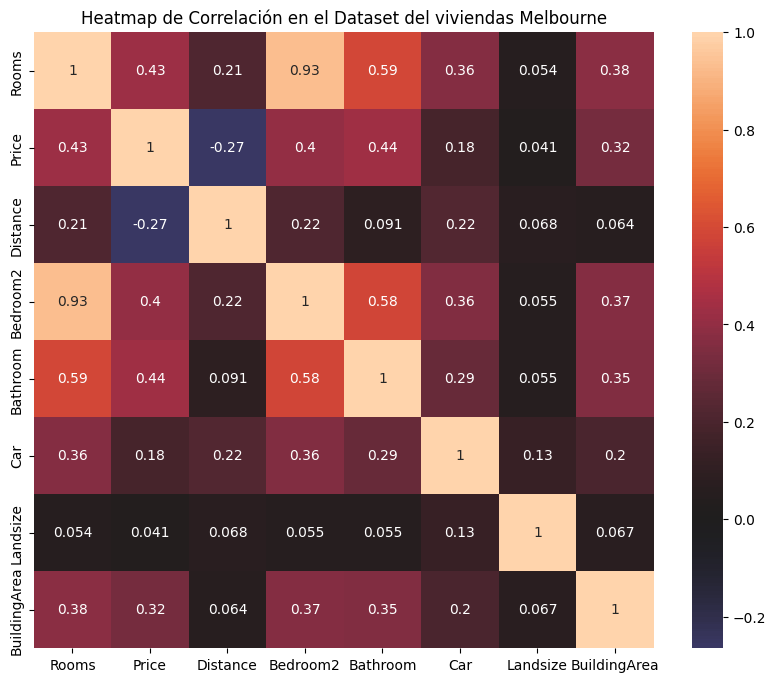

In [20]:
# Heatmap de correlación

#Creo la matriz de correlación con las variables deseadas
corrmat = melb_df3[['Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea']].corr()

#Y creo ek Heatmap de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corrmat, annot=True, center=0)

# Establecer el título del gráfico
plt.title("Heatmap de Correlación en el Dataset del viviendas Melbourne")

# Mostrar el gráfico
plt.show()

Las relaciones más fuertes son de Habitaciones secundarias con número de cuartos y distancia con número de baños, sin embargo no son relaciones interesantes para analizar. <br>
Por otro lado se encuentra una relación regular de área contruida con distancia del CDB.


#### Gráfico de cajas

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Northern Metropolitan'),
  Text(1, 0, 'Western Metropolitan'),
  Text(2, 0, 'Southern Metropolitan'),
  Text(3, 0, 'Eastern Metropolitan'),
  Text(4, 0, 'South-Eastern Metropolitan'),
  Text(5, 0, 'Eastern Victoria'),
  Text(6, 0, 'Northern Victoria'),
  Text(7, 0, 'Western Victoria')])

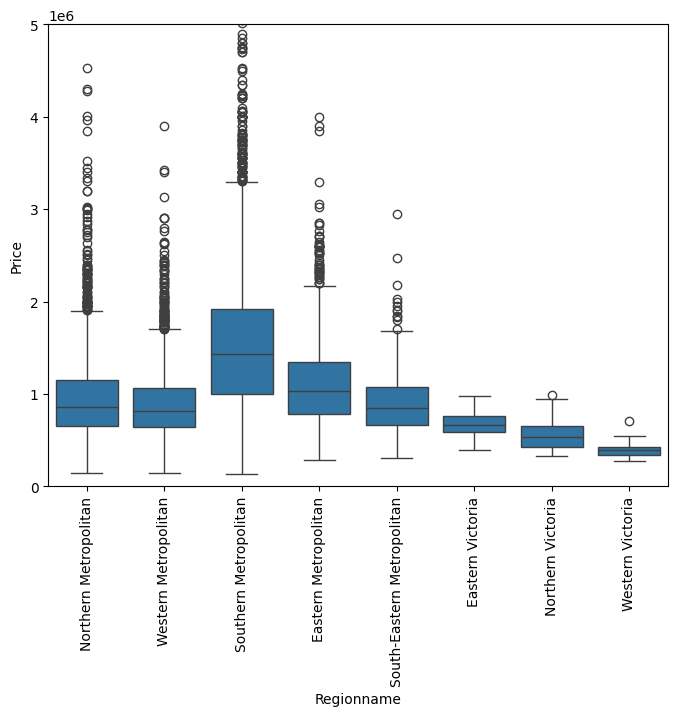

In [21]:
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x='Regionname', y ="Price", data = melb_df3)
fig.axis(ymin=0, ymax=5000000)
plt.xticks(rotation = 90)

Se puede observar que efectivamente, en cada región los precios tienen muchos outliers. Por tanto, El precio y la región no se relacionan directamente por si solos.

#### Gráfico de violin

In [22]:
#Reemplazo los valores de la columna "Type" del DF usando los valores del diccionario.
melb_df3['Type'].loc[melb_df3['Type'] == "h"] = "Casa"
melb_df3['Type'].loc[melb_df3['Type'] == "u"] = "Unidades/duplex"
melb_df3['Type'].loc[melb_df3['Type'] == "t"] = "Edificaciones"


# Crear el Violin Plot con Plotly Express
fig = px.violin(melb_df3, x="Regionname", y="Price", color="Type", box=True, points="all",
                title="Distribución de viviendas por Región, Precio y tipo")
fig.update_layout(xaxis_title="Región", yaxis_title="Precio")
fig.update_traces(marker=dict(size=3))  # Tamaño de los puntos en el violin plot

fig.show()

<ipython-input-22-97f2f922d0a9>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-22-97f2f922d0a9>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-22-97f2f922d0a9>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Se identifica que las viviendas tipo casa tienen la mayor variación,las unidades o duplex y edificaciones tienen más consistencia.

### **Conclusiones**

*   No existe relación directa entre precio y área del terreno a Nivel Región. Por tanto, la hipótesis planteada es falsa. Entonces, se asume la hipótesis alternativa (H1 = No existe relación directa de precio y área del terreno).
* Para futuros análisis se podría explorar la relación la Distancia del CDB, Tipo de viviendo y nro de cocheras. Con esas condiciones posiblemente se cumpla la relación Precio y Área del terreno.

